# Проект исследования ценнообразования недвижимости в Санкт-Петербурге и пригородах

## Цели исследования

    Определить какие факторы больше всего влияют на стоимость квартиры.
    Выбрать среди населённых пунктов Лен. области топ-10 по количеству объявлений и выделить среди них с самой высокой и 
    низкой стоимостью жилья
    Определить какие факторы влияют на ценообразование квартир в центре Санкт-Петербурга

## Входные данные

    Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет

## План исследования

### Этап 1. Получим данные

    - Импорт библиотек
    - Прочитаем файл, выведем на экран
    - Осмотрим датафрейм
    - Посмотрим общую информацию

### Этап 2. Обработаем данные

    - посмотрим на пропуски, при возможности удалим либо заменим
    - удалим дубликаты

### Этап 3. Посчитаем и добавим в таблицу

    - цену квадратного метра
    - день недели, месяц и год публикации объявления
    - этаж квартиры; варианты — первый, последний, другой
    - соотношение жилой и общей площади, а также отношение площади кухни к общей

### Этап 4. Проанализируем данные

#### 4.1. Изучим следующие параметры: 
    -площадь
    -цена
    -число комнат
    -высота потолков
    Построим гистограммы для каждого параметра.

#### 4.2. Изучим время продажи квартиры:
    - построим гистограмму 
    - посчитаем среднее и медиану 
    - опишем, сколько обычно занимает продажа 
    - ответим на вопрос - Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

#### 4.3. Уберём редкие и выбивающиеся значения

#### 4.4. Изучим зависимости стоимости квартиры от:
    - площади
    - числа комнат 
    - удалённости от центра 
    - на каком этаже расположена квартира: первом, последнем или другом. 
    - даты размещения: дня недели, месяца и года

#### 4.5. Выделим населенные пункты 
    с самой высокой и низкой стоимостью жилья среди топ-10 с наибольшим числом объявлений

#### 4.6. Определим границу центра Санкт-Петербурга
    исходя из графика зависимости цены от удалённости от центра

#### 4.7. Проанализируем сегмент квартир в центре

### Этап 5. Сделаем общие выводы

## Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Этап 1. Получим данные

In [2]:
#импортируем библиотеки
import pandas as pd             
from datetime import datetime
import matplotlib.pyplot as plt

In [7]:
try: 
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #путь к файлу в общем хранилище
except: 
    data = pd.read_csv('C:/Users/Admin/Downloads/real_estate_data.csv', sep='\t') #путь к файлу на локальной машине
pd.set_option('display.max_columns', 50) 

In [8]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [9]:
data.info()               #посмотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Очень много пропущенных значений

In [10]:
data.duplicated().sum()  #посмотрим количесво дубликатов

0

А вот явных дубликатов в данных нет совсем

### Задачи которые требуется решить:

- разобраться с пропусками
- изменить формат столбца дата публикации на формат даты

## Этап 2. Обработаем данные

In [11]:
data.isna().sum()   #посмотрим на пропуски в датафрейме

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
(data['ceiling_height'].isna().sum()/len(data)*100).round(2) #посчитаем пропуски по высоте потолков в процентах

38.8

38% - пропущенные значения. Очень много.
Скорее всего при заполнении данных о недвижимости пропустили ввод высоты потолков.
Удалять строки с пропусками не будем, высота потолков не обязательный параметр при выборе квартиры.

floors_total (общее количество этажей) = 86 пропущенных значений - немного, но удалять их не будем, данные могут иметь важную информацию

In [14]:
data['is_apartment'].isna().sum() #Пропуски в столбце "апартаменты"

20924

In [15]:
data['is_apartment'].sort_values().unique()

array([False, True, nan], dtype=object)

Данные представленны в булевом формате. Отсутвие данных может означать, что недвижимость не является апартаментами. Поэтому поменяем пропущенные значения на False

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False) #заменим пропуски на булево значение 

In [17]:
data['is_apartment'].sort_values().unique() #проверим результат

array([False,  True])

In [18]:
data['balcony'].isna().sum() #Посмотрим пропуски по балконам

11519

Почти половина данных = пропущенные значения. 
Вероятнее всего, пропущенные значения означают, что балкона нет, ведь его наличие это хороший аргумент при продаже квартиры и не указывать его невыгодно

In [19]:
data['balcony'] = data['balcony'].fillna(0) #заменим пропуски на нули

In [20]:
data['balcony'].isna().sum() #проверим  отсутствие пропусков

0

In [21]:
data['locality_name'].isna().sum() #посмотрим на пропуски по названиям населённого пункта

49

Данные строки придется удалить, ведь не зная, где находится продаваемая квартира, смысл рассматривать данное предложение пропадает

In [22]:
data = data.dropna(subset=['locality_name']) #удаляем строки с пропусками по этому столбцу

In [23]:
data['locality_name'].isna().sum() #проверим результат

0

Остальные столбцы корректировать по пропущенным значениям нет смысла. Логичной замены не подставить, а удалять строки неразумно, данные могут быть полезны

In [24]:
#переведем данные столбца "дата публикации" в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [25]:
data.head() #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [26]:
data['last_price'] = data['last_price']/1000000       #заменим огромные числа на миллионы

In [27]:
data.head() #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [28]:
data['rooms'].value_counts() #проверим столбец с количеством комнат

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Нулевых значений аж 197 штук. Отсутствие комнат в квартире быть не может, или это уже не квартира. 
Поменяем нули на среднее значение

In [29]:
data['rooms'].mean()

2.070105708245243

In [30]:
data.loc[data['rooms'] == 0, 'rooms'] = 2

In [31]:
data['rooms'].value_counts()

2     8121
1     8036
3     5797
4     1175
5      326
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

In [32]:
data['floors_total'].sort_values().unique()  #посмотрим на уникальные значения

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [33]:
data['floors_total'].isna().sum()

85

Пропусков немного, но оставим их, данные могут быть полезны.
А вот значения 52 и 60 этажей вызывают сомнения, таких высоких зданий в Спб и его пригородах практически нет. Если не брать в расчет Лахта-центр

In [34]:
data[(data['floors_total']>= 52)] #выведем срез данных сомнительных значений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3.800,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,False,False,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3.978,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,False,False,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


В Кронштадте жилых зданий высотой в 60 этажей нет. Да и в Спб высотой в 52 этажа тоже.
Всего 2 строки, удаляем их, дабы избежать ненужных выбросов

In [35]:
data = data.loc[(data['floors_total']<52)] #удалим выбросы и сбросим индексирование

In [36]:
data['floors_total'].sort_values().unique() #проверим

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37.])

In [37]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) #переименуем столбец

In [38]:
data.info() #проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23563 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23563 non-null  int64         
 1   last_price            23563 non-null  float64       
 2   total_area            23563 non-null  float64       
 3   first_day_exposition  23563 non-null  datetime64[ns]
 4   rooms                 23563 non-null  int64         
 5   ceiling_height        14479 non-null  float64       
 6   floors_total          23563 non-null  float64       
 7   living_area           21698 non-null  float64       
 8   floor                 23563 non-null  int64         
 9   is_apartment          23563 non-null  bool          
 10  studio                23563 non-null  bool          
 11  open_plan             23563 non-null  bool          
 12  kitchen_area          21341 non-null  float64       
 13  balcony         

## Этап 3. Расчитаем и добавим в таблицу

#### Цена квадратного метра:

In [39]:
data['price_meter'] = data['last_price'] / data['total_area']*1000000 #добавим столбец с расчитанной ценой метра2
data['price_meter'] = data['price_meter'].round(decimals=2) #оставим две цифры после запятой

In [40]:
data.head() #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


#### День недели, месяц и год публикации объявления:

In [42]:
data['day'] = data['first_day_exposition'].dt.weekday        #добавим столбец с днями недели
data['month'] = data['first_day_exposition'].dt.month    #также с месяцами
data['year'] = data['first_day_exposition'].dt.year             #и годами

In [43]:
data.head()  #посмотрим результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day,month,year
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


#### Этаж квартиры:
варианты
- первый
- последний
- другой

In [44]:
def floor_level(row):       #напишем функцию для категоризации квартир по этажам
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [45]:
data['floor_level'] = data.apply(floor_level, axis=1)  #добавим столбец с условием функции

In [46]:
data.head()  #проверим результаты

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day,month,year,floor_level
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


#### Соотношения:
- жилой и общей площади
- площади кухни к общей

In [47]:
data['living_ratio'] = data['living_area'] / data['total_area'] #добавим столбец с расчитанным отношением жилой и общей площади
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] #также сделаем для площади кухни


In [48]:
data.head()  #проверим результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day,month,year,floor_level,living_ratio,kitchen_ratio
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,NaN,NaN
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.320000,0.410000


## Этап 4. Проанализируем данные

#### 4.1. Изучим следующие параметры: 
    -площадь
    -цена
    -число комнат
    -высота потолков

#### Изучим данные площади квартир

count    23563.000000
mean        60.324316
std         35.658196
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

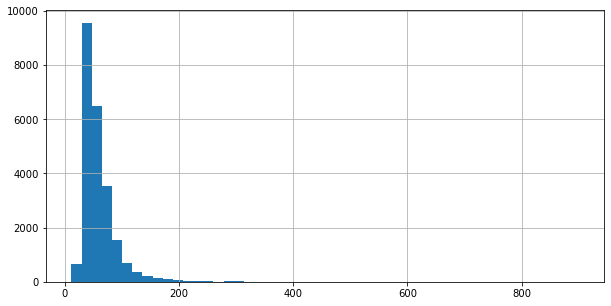

In [49]:
data['total_area'].hist(bins=50, figsize=(10,5)) #построим гистограмму и посмотрим на статистику площади квартир
data['total_area'].describe()

Среднее значение 60 кв.метров, максимальное значение 900. На графике видно, что таких значений единицы, скорее всего это выброс.

<AxesSubplot:>

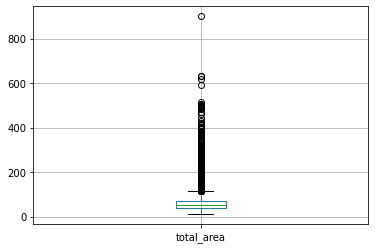

In [50]:
data.boxplot(column='total_area') #посторим "ящик с усами" для поиска выбросов

На графике заметно, что после отметки приблизительно в 150 все превышающие значения сформировали череду точек-выбросов 

(0.0, 150.0)

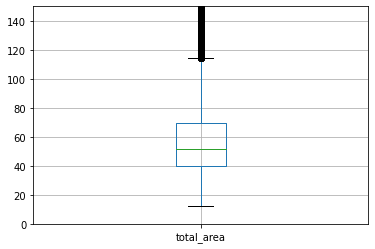

In [51]:
data.boxplot(column='total_area')     #посторим график с границами 0,150
plt.ylim(0, 150)   

Теперь видим более точнее, 4й квартиль заканчивается на отметке около 115 кв.метров. Всё, что более = выбросы

In [52]:
#посмотрим сколько таких значений в наших данных
print('Кол-во выбросов по площади:', len(data[(data['total_area']>=115)]))
print('Процент выбросов от общего кол-ва: {:.0%}'.format(len(data[(data['total_area']>=115)])/len(data)))

Кол-во выбросов по площади: 1229
Процент выбросов от общего кол-ва: 5%


In [53]:
#создадим переменную и сохраним в ней срез без выбросов
total_area_slize = data.loc[(data['total_area']<= 115)] 

count    22354.000000
mean        54.401980
std         19.445294
min         12.000000
25%         39.400000
50%         50.100000
75%         65.600000
max        115.000000
Name: total_area, dtype: float64

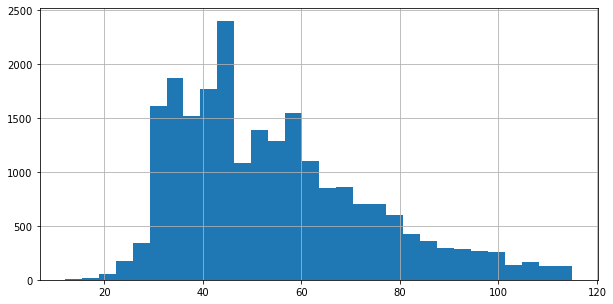

In [54]:
total_area_slize['total_area'].hist(bins=30, figsize=(10,5)) #посмотрим на новую статистику
total_area_slize['total_area'].describe()

In [55]:
total_area_slize['total_area'].value_counts().head()

45.0    419
42.0    383
31.0    346
60.0    346
44.0    343
Name: total_area, dtype: int64

Самые продаваемые квартиры площадью 45 кв.метров.

#### Изучим данные цен квартир

count    23563.000000
mean         6.540283
std         10.911370
min          0.012190
25%          3.400000
50%          4.647000
75%          6.790000
max        763.000000
Name: last_price, dtype: float64

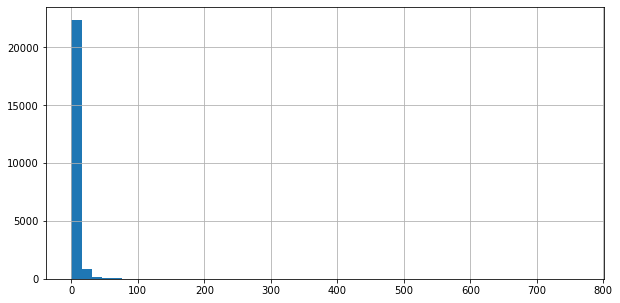

In [56]:
data['last_price'].hist(bins=50, figsize=(10,5)) #посмотрим на график для цены
data['last_price'].describe()

Таже ситуация и с ценами. Построим "ящик с усами"

<AxesSubplot:>

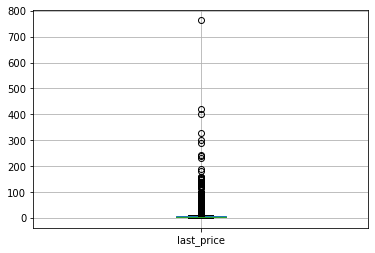

In [57]:
data.boxplot(column='last_price')

Нечитабельно, нужно ограничить график

(-1.0, 20.0)

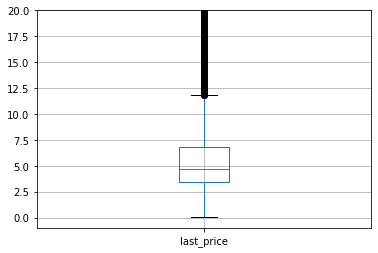

In [58]:
data.boxplot(column='last_price')
plt.ylim(-1, 20) 

На этом графике 4-й квартиль заканчивается на позиции в 12 млн. Далее идут выбросы

In [59]:
#посмотрим сколько выбросов в данных
print('Кол-во выбросов по цене:', len(data[(data['last_price']>=12)]))
print('Процент выбросов от общего кол-ва: {:.0%}'.format(len(data[(data['last_price']>=12)])/len(data)))

Кол-во выбросов по цене: 1983
Процент выбросов от общего кол-ва: 8%


In [60]:
#создадим переменную и сохраним в ней срез без выбросов
last_price_slize = data.loc[(data['last_price']<= 12)]

count    21637.000000
mean         4.876757
std          2.272301
min          0.012190
25%          3.300000
50%          4.400000
75%          6.000000
max         12.000000
Name: last_price, dtype: float64

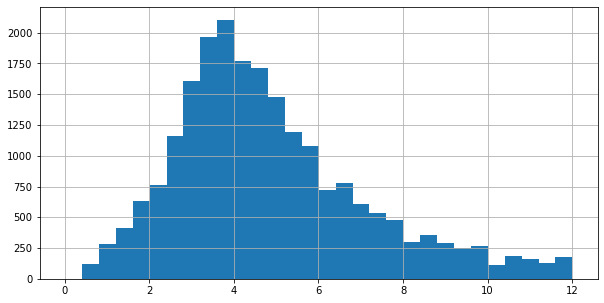

In [61]:
last_price_slize['last_price'].hist(bins=30, figsize=(10,5)) #посмотрим на новую статистику
last_price_slize['last_price'].describe()

Данные на графике выстроились в нормальном распределении

In [62]:
last_price_slize['last_price'].value_counts().head()

4.5    341
3.5    289
4.0    260
4.3    260
4.2    258
Name: last_price, dtype: int64

Средняя и самая популярная цена на квартиру в нашей выборке = 4,5 миллиона рублей

#### Изучим число комнат

count    23563.000000
mean         2.087171
std          1.062014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

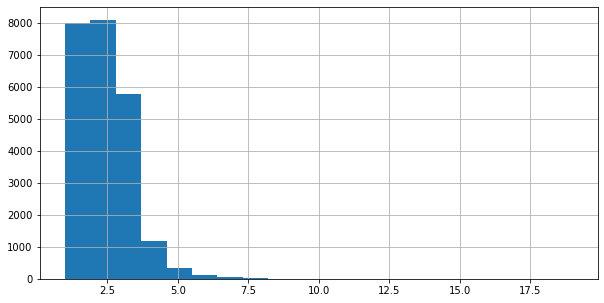

In [63]:
data['rooms'].hist(bins=20, figsize=(10,5)) #построим график количества комнат
data['rooms'].describe()

Выборка по комнатам близка к нормальному распределению, но присутствуют аномальные значения

<AxesSubplot:>

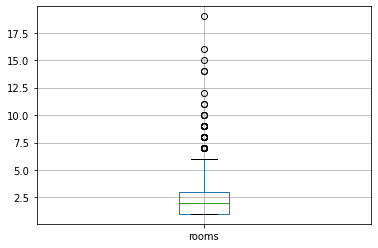

In [64]:
data.boxplot(column='rooms') #посмотрим на диаграмму

Так и есть, квартиры с более чем 6 комнат уходят за пределы нормального распределения

In [65]:
#узнаем количество выбросов
print('Кол-во выбросов комнат:', len(data[(data['rooms']>=6)]))
print('Процент выбросов от общего кол-ва: {:.0%}'.format(len(data[(data['rooms']>=6)])/len(data)))

Кол-во выбросов комнат: 194
Процент выбросов от общего кол-ва: 1%


In [66]:
#создадим переменную и сохраним в ней срез без выбросов
rooms_slize = data.loc[(data['rooms']< 6)]

count    23369.000000
mean         2.046857
std          0.955705
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

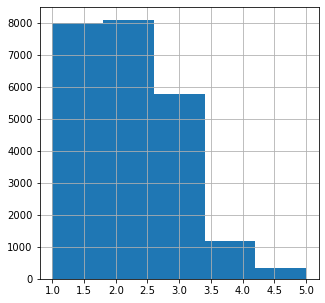

In [67]:
rooms_slize['rooms'].hist(bins=5, figsize=(5,5)) #посмотрим на новую статистику
rooms_slize['rooms'].describe()

In [68]:
rooms_slize['rooms'].value_counts().head()

2    8090
1    8003
3    5779
4    1172
5     325
Name: rooms, dtype: int64

Наиболее востребованными на рынке являются двухкомнатные квартиры 

#### Изучим высоту потолков

count    14479.000000
mean         2.771284
std          1.262069
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

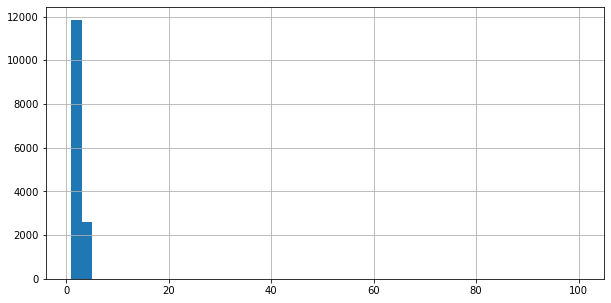

In [69]:
data['ceiling_height'].hist(bins=50, figsize=(10,5)) #и график высоты потолков
data['ceiling_height'].describe()

Видно, что значения в 100 метров является не только выбросом, но и ошибкой. Вряд ли есть такие квартиры

<AxesSubplot:>

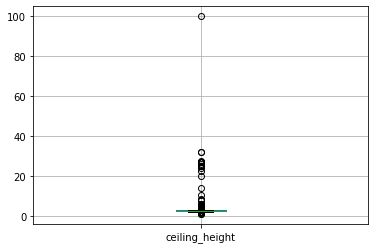

In [70]:
data.boxplot(column='ceiling_height') #посмотрим детальнее

(0.0, 4.0)

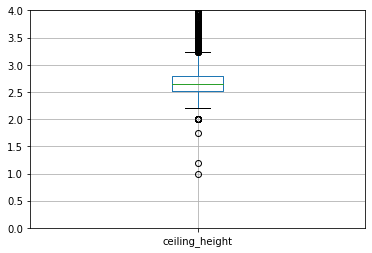

In [71]:
data.boxplot(column='ceiling_height')  #поставим ограничения
plt.ylim(0, 4) 

Теперь видим, что потолки высотой ниже 2 метров и выше 3,25 метров не укладываются в нормальное распределение.

In [72]:
#узнаем количество выбросов
print('Кол-во выбросов по потолкам:', 
      len(data[(data['ceiling_height']<=2)
               |(data['ceiling_height']>=3.25)]))

print('Процент выбросов от общего кол-ва: {:.0%}'
      .format(len(data[(data['ceiling_height']<=2)
                       |(data['ceiling_height']>=3.25)])
              /len(data)))

Кол-во выбросов по потолкам: 815
Процент выбросов от общего кол-ва: 3%


In [73]:
#создадим переменную и сохраним в ней срез без выбросов
ceiling_height_slize = data.query('2 < ceiling_height < 3.25')

count    13664.000000
mean         2.680224
std          0.184639
min          2.200000
25%          2.500000
50%          2.640000
75%          2.760000
max          3.240000
Name: ceiling_height, dtype: float64

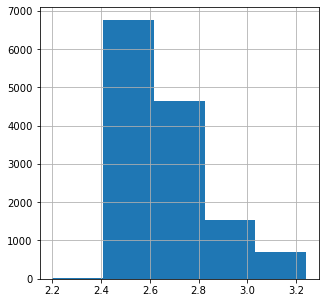

In [74]:
ceiling_height_slize['ceiling_height'].hist(bins=5, figsize=(5,5)) #посмотрим на новую статистику
ceiling_height_slize['ceiling_height'].describe()

In [75]:
ceiling_height_slize['ceiling_height'].value_counts().head()

2.5    3515
2.6    1645
2.7    1571
3.0    1108
2.8     988
Name: ceiling_height, dtype: int64

Самые популярные квартиры в продаже с потолками высотой 2,5 метра

### 4.2. Изучим время продажи квартиры:
    - построим гистограмму 
    - посчитаем среднее и медиану 
    - опишем, сколько обычно занимает продажа 
    - ответим на вопрос - Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    20392.000000
mean       180.748774
std        219.741477
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

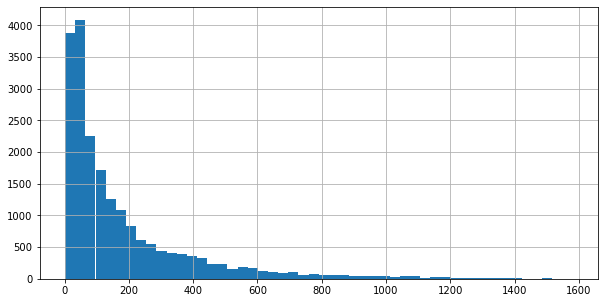

In [76]:
data['days_exposition'].hist(bins=50, figsize=(10,5)) #построим гистограмму и посмотрим на статистику длительности продажи
data['days_exposition'].describe()

В районе 500 дней происходит резкое снижение

(-1.0, 600.0)

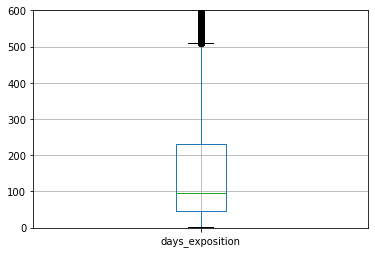

In [77]:
data.boxplot(column='days_exposition')
plt.ylim(-1, 600)

In [78]:
data_days_exposition = data.loc[(data['days_exposition']<= 500)] #создадим переменную, сохраним в ней данные без выбросов

count    18655.000000
mean       127.009381
std        119.245470
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        500.000000
Name: days_exposition, dtype: float64

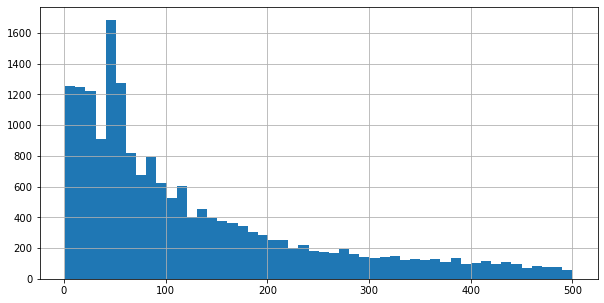

In [79]:
data_days_exposition['days_exposition'].hist(bins=50, figsize=(10,5)) #построим гистограмму и посмотрим на статистику
data_days_exposition['days_exposition'].describe()

    В среднем продажа квартиры занимает от 41 дней до 181 дня.
    Соответственно, продажу быстрее, чем за 41 день можно считать быстрой, а более полугода = долгой.


    Среднее значение нашей выборки составляет 126 дней
    Медианное значение = 84 дня

In [80]:
data.sort_values(by='days_exposition').head(5) #посмотрим на сверхбыстрые продажи

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day,month,year,floor_level,living_ratio,kitchen_ratio
1632,19,4.000,49.9,2019-05-01,2,2.5,9.0,25.0,1,False,False,False,10.0,0.0,Санкт-Петербург,13567.0,14384.0,1.0,20.0,1.0,681.0,1.0,80160.32,2,5,2019,первый,0.501002,0.200401
16053,4,4.070,45.1,2019-04-30,2,NaN,5.0,22.7,3,False,False,False,6.6,0.0,Санкт-Петербург,40859.0,11668.0,2.0,485.0,0.0,NaN,2.0,90243.90,1,4,2019,другой,0.503326,0.146341
13061,20,6.100,51.4,2019-04-29,2,3.0,5.0,31.7,4,False,False,False,6.9,1.0,Санкт-Петербург,10776.0,9389.0,0.0,NaN,0.0,NaN,2.0,118677.04,0,4,2019,другой,0.616732,0.134241
16212,0,7.806,25.0,2019-04-30,1,3.0,5.0,NaN,5,False,False,False,NaN,0.0,Санкт-Петербург,36525.0,10302.0,0.0,NaN,0.0,NaN,2.0,312240.00,1,4,2019,последний,NaN,NaN
17413,3,2.950,35.0,2017-11-10,1,NaN,12.0,18.0,11,False,False,False,6.5,1.0,Санкт-Петербург,49017.0,16550.0,0.0,NaN,0.0,NaN,3.0,84285.71,4,11,2017,другой,0.514286,0.185714


In [81]:
data.sort_values(by='days_exposition', ascending=False).head(5) #и продажи долгожители

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day,month,year,floor_level,living_ratio,kitchen_ratio
18843,11,3.500000,48.2,2014-12-15,2,2.50,5.0,27.4,2,False,False,False,7.7,3.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580.0,72614.11,0,12,2014,другой,0.568465,0.159751
1109,1,34.878556,95.8,2014-12-09,2,NaN,6.0,58.3,5,True,False,False,20.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0,364076.78,1,12,2014,другой,0.608559,0.208768
9553,11,10.600000,80.0,2014-12-09,3,2.85,17.0,44.0,9,False,False,False,15.0,0.0,Санкт-Петербург,17101.0,17110.0,0.0,NaN,0.0,NaN,1553.0,132500.00,1,12,2014,другой,0.550000,0.187500
1885,2,13.300000,79.6,2014-12-09,2,3.00,8.0,42.7,7,False,False,False,18.0,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1513.0,167085.43,1,12,2014,другой,0.536432,0.226131
20969,18,13.300000,133.0,2015-02-11,4,3.00,5.0,58.0,2,False,False,False,45.0,0.0,Санкт-Петербург,24653.0,5032.0,0.0,NaN,1.0,534.0,1512.0,100000.00,2,2,2015,другой,0.436090,0.338346


In [82]:
print('Количество аномально быстрых продаж:', len(data[(data['days_exposition']<4)]))
print('Процент аномально быстрых продаж от общего кол-ва: {:.0%}'.format(len(data[(data['days_exposition']<4)])/len(data)))

Количество аномально быстрых продаж: 161
Процент аномально быстрых продаж от общего кол-ва: 1%


In [83]:
print('Количество аномально долгих продаж:', len(data[(data['days_exposition']>=500)]))
print('Процент аномально долгих продаж от общего кол-ва: {:.0%}'.format(len(data[(data['days_exposition']>=500)])/len(data)))

Количество аномально долгих продаж: 1742
Процент аномально долгих продаж от общего кол-ва: 7%


    Сверхбыстрые продажи, это 1-3 дня, таких немного всего 1% от общего количества.
    Сверхдолгие продажи - более 500 дней, таких 7% от всех продаж.

### 4.4. Изучим зависимость стоимости квартиры от:
    - площади
    - числа комнат 
    - удалённости от центра 
    - на каком этаже расположена квартира: первом, последнем или другом. 
    - даты размещения: дня недели, месяца и года

In [84]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day,month,year,floor_level,living_ratio,kitchen_ratio
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,NaN,NaN
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.320000,0.410000


#### Зависимость цены от площади квартиры

Text(0.5, 1.0, 'цена-площадь')

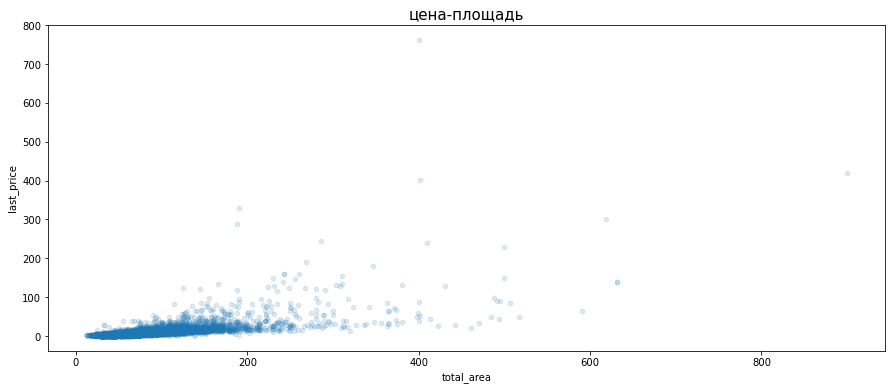

In [85]:
#Посмотрим на зависимость цены квартиры от её площади
data.plot(y='last_price',x='total_area',kind='scatter', alpha=0.15, figsize=(15,6))
plt.title('цена-площадь', fontsize=15)

In [86]:
data['total_area'].corr(data['price_meter'])

0.3025689472474868

Незначительная корреляция есть: чем больше площадь квартиры, тем она дороже

#### Зависимость цены от количества комнат в квартире

Text(0.5, 1.0, 'цена-комнаты')

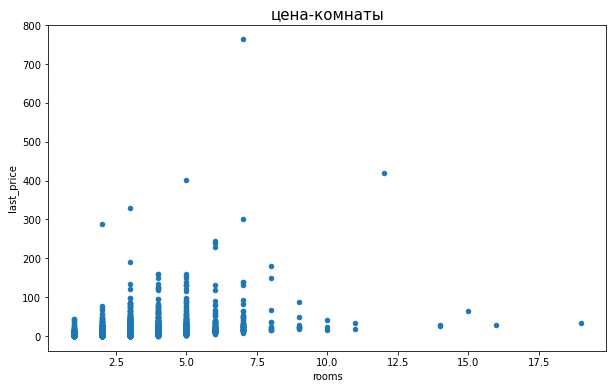

In [87]:
#Посмотрим на зависимость цены квартиры от кол-ва комнат по общему датафрейму
data.plot(y='last_price',x='rooms',kind='scatter', figsize=(10,6))
plt.title('цена-комнаты', fontsize=15)

In [88]:
#Посмотрим корреляцию между площадью и ценой
data['rooms'].corr(data['price_meter'])

0.05935020842754861

Корреляция между ценой и количеством комнат почти нулевая

#### Зависимоть цены от удаленности от центра

Text(0.5, 1.0, 'цена-удаленность от центра')

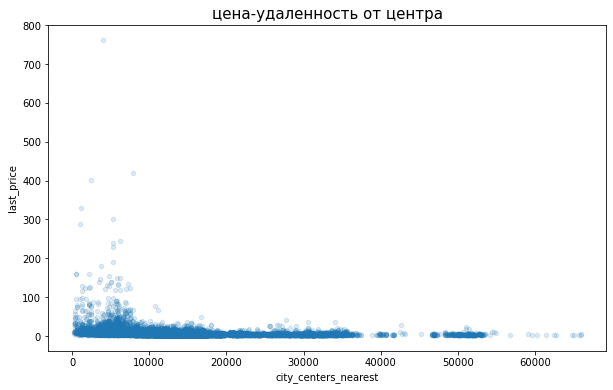

In [89]:
#Посмотрим на зависимость цены квартиры от удаленности от центра
data.plot(y='last_price',x='city_centers_nearest',kind='scatter', figsize=(10,6), alpha=0.15)
plt.title('цена-удаленность от центра', fontsize=15)

In [90]:
data['city_centers_nearest'].corr(data['price_meter'])

-0.31762654320921624

Корреляция отрицательная, значит отдаляясь от центра квартиры становятся дешевле

#### Зависимость цены от этажа квартиры

In [91]:
floor_pivot = data.pivot_table(index='floor_level', #посмотрим сводную по категориям этажности квартир
                               values='last_price',
                               aggfunc='mean')
floor_pivot

,last_price
floor_level,
другой,6.674670
первый,4.802604
последний,7.359138


Text(0.5, 1.0, 'цена-этаж')

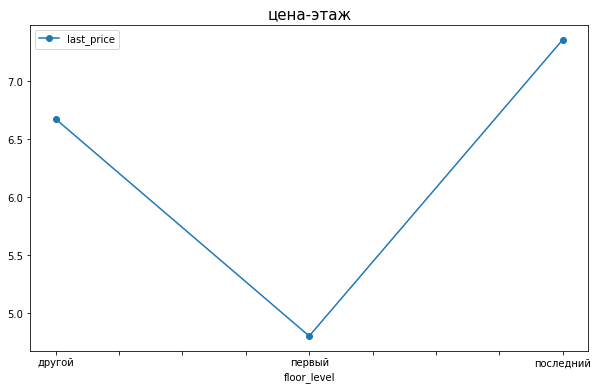

In [92]:
#Нарисуем график по сводной таблице
floor_pivot.plot(y='last_price',style='o-', figsize=(10,6))
plt.title('цена-этаж', fontsize=15)

Точно можно сказать, что квартиры на первых этажах дешевле остальных

#### Зависимость цены от даты размещения

In [93]:
day_pivot = data.pivot_table(index='day', #посмотрим сводную по дням недели и средним ценам
                               values='last_price',
                               aggfunc='mean')
day_pivot

,last_price
day,
0,6.519039
1,6.389281
2,6.630246
3,6.707446
4,6.359714
5,6.986165
6,6.242137


Text(0.5, 1.0, 'цена-день недели')

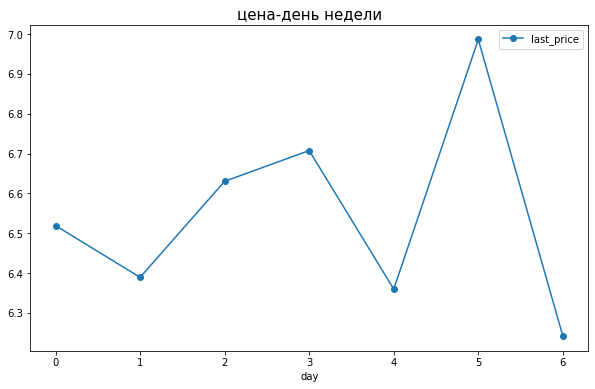

In [94]:
#Нарисуем график по сводной
day_pivot.plot(y='last_price',style='o-', figsize=(10,6))
plt.title('цена-день недели', fontsize=15)

На графике видна такая тенденция:
- в субботу выкладывают квартиры по более высокой цене
- в воскресенье наоборот - по наиболее низкой

In [95]:
month_pivot = data.pivot_table(index='month', #посмотрим сводную по месяцам и средним ценам
                               values='last_price',
                               aggfunc='mean')
month_pivot

,last_price
month,
1,6.664171
2,6.463941
3,6.359922
4,6.743395
5,6.591127
6,6.318354
7,6.639479
8,6.345784
9,6.839898


Text(0.5, 1.0, 'цена-месяц')

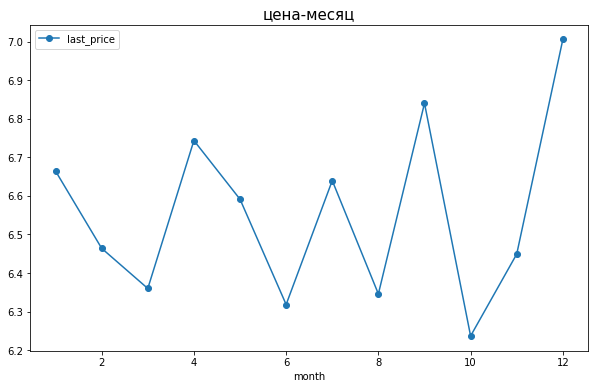

In [96]:
#Нарисуем график
month_pivot.plot(y='last_price',style='o-', figsize=(10,6))
plt.title('цена-месяц', fontsize=15)

Наиболее дешевые квартиры появляются в объявлениях в октябре, в декабре - наиболее дорогие

In [97]:
year_pivot = data.pivot_table(index='year', #посмотрим сводную по годам и средним ценам
                               values='last_price',
                               aggfunc='mean')
year_pivot

,last_price
year,
2014,12.046600
2015,8.595669
2016,6.829117
2017,6.582530
2018,5.954552
2019,6.779324


Text(0.5, 1.0, 'цена-год')

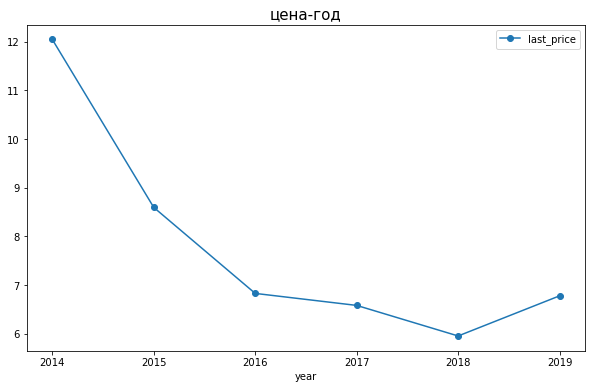

In [98]:
#Нарисуем график
year_pivot.plot(y='last_price',style='o-', figsize=(10,6))
plt.title('цена-год', fontsize=15)

На графике отчетливо видно снижение цены начиная с 2014 по 2018. Предположительно, цены на недвижимость в 2014 году были завышены в связи с кризисом в этом году.
В последствии, стабилизация в экономике привела к снижению стоимости квартир. Вплоть до 2018 года, далее мы видим повышение цены.

Посмотрим на динамику цен за квадратный метр по годам. Возможно будут расхождения с предыдущим графиком.

In [99]:
year_m2_pivot = data.pivot_table(index='year', #посмотрим сводную по годам и средним ценам за кв.метр
                               values='price_meter',
                               aggfunc='mean')
year_m2_pivot

,price_meter
year,
2014,124302.355882
2015,104640.330051
2016,98291.798332
2017,97638.122260
2018,97764.195225
2019,107047.268137


Text(0.5, 1.0, 'цена за м2-год')

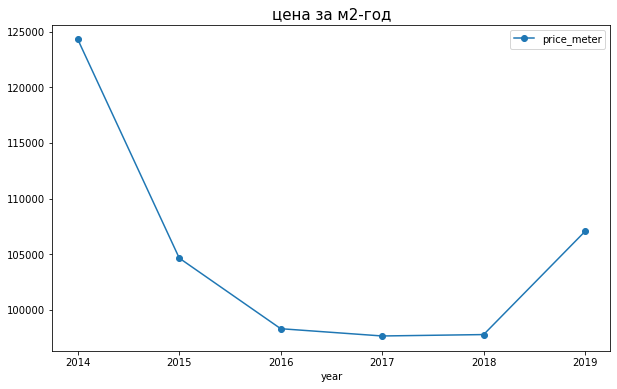

In [100]:
year_m2_pivot.plot(y='price_meter',style='o-', figsize=(10,6)) #построим график
plt.title('цена за м2-год', fontsize=15)

Графики цен за квадратный метр и за квартиру по годам имеют схожую динамику.

In [101]:
#посмотрим на общую табличку корреляций по параметрам
corr = data[['price_meter',\
           'total_area',\
           'last_price',\
           'city_centers_nearest',\
           'rooms']].corr()
corr

,price_meter,total_area,last_price,city_centers_nearest,rooms
price_meter,1.000000,0.302569,0.736799,-0.317627,0.059350
total_area,0.302569,1.000000,0.653620,-0.231193,0.757112
last_price,0.736799,0.653620,1.000000,-0.206382,0.364324
city_centers_nearest,-0.317627,-0.231193,-0.206382,1.000000,-0.187438
rooms,0.059350,0.757112,0.364324,-0.187438,1.000000


#### Выводы:

        Чем больше площадь квартиры, тем она дороже.
        Количество комнат не влияет на ценообразование.
        Отдаляясь от центра, квартиры дешевле в цене.
        Квартиры на первых этажах дешевле остальных.
        Зависимость цены от даты размещения объявления (день, месяц) практически нет - в рамках среднего значения.
        С 2014г. по 2018г. наблюдалось снижение цены на квартиры, с 2018г. - повышение.

### 4.5. Выделим населенные пункты 
    с самой высокой и низкой стоимостью жилья среди топ-10 с наибольшим числом объявлений

In [102]:
#создадим переменную с 10-ю городами с наибольшим количеством объявлений
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15650
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [103]:
town_list = ['Санкт-Петербург',      #создадим список, на который будем ссылаться 
             'посёлок Мурино', 
             'посёлок Шушары', 
             'Всеволожск',
             'Пушкин', 
             'Колпино', 
             'посёлок Парголово', 
             'Гатчина',
             'деревня Кудрово', 
             'Выборг']

In [104]:
#построим сводную таблицу 10 городов, отсортируем по убыванию по средней цена за кв.метр
town_top_ten = (data.query('locality_name in @town_list')
.pivot_table(index='locality_name', values='price_meter', aggfunc='mean')
.sort_values('price_meter', ascending=False))
town_top_ten

,price_meter
locality_name,
Санкт-Петербург,114869.862571
Пушкин,103125.819377
деревня Кудрово,92473.547559
посёлок Парголово,90175.913089
посёлок Мурино,85673.259865
посёлок Шушары,78551.344647
Колпино,75424.579112
Гатчина,68746.146515
Всеволожск,68654.473970


<AxesSubplot:ylabel='locality_name'>

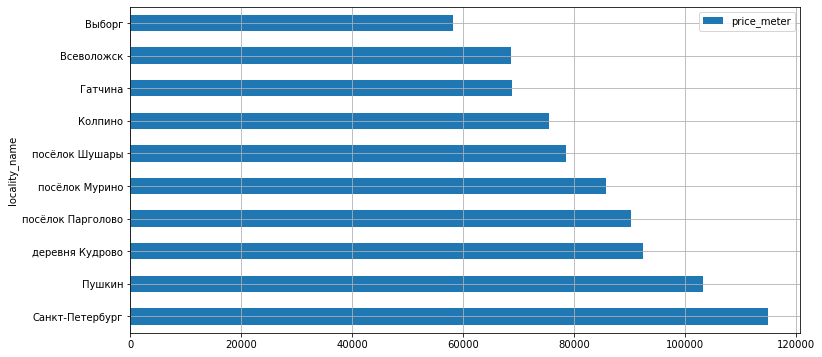

In [105]:
#построим график
town_top_ten.plot(y='price_meter', grid=True, figsize=(12,6), kind='barh', stacked=True)

#### Выводы:
    Самая высокая стоимость квадратного метра в Санкт-Петербурге = 114 869 рублей
    Самая низкая цена за квадратный метр в Выборге 58 141 рубль

### 4.6. Определим границу центра Санкт-Петербурга
    исходя из графика зависимости цены от удалённости от центра

In [106]:
spb_centr = data.dropna(subset=['city_centers_nearest']) #создадим переменную и удалим в столбце пропуски
spb_centr['city_centers_nearest'].head() #проверим данные

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: city_centers_nearest, dtype: float64

In [107]:
#переведем данные в километры, уберем лишние цифры после запятой и изменим тип данных
spb_centr['city_centers_nearest'] = (spb_centr['city_centers_nearest']/1000).round(0).astype(int) 
spb_centr['city_centers_nearest'].head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_11472/1920780235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_centr['city_centers_nearest'] = (spb_centr['city_centers_nearest']/1000).round(0).astype(int)


0    16
1    19
2    14
3     7
4     8
Name: city_centers_nearest, dtype: int32

In [108]:
#создадим столбец с ценой квартиры на километр
spb_centr['price_for_km'] = spb_centr['last_price']/spb_centr['city_centers_nearest']

C:\Users\Admin\AppData\Local\Temp/ipykernel_11472/4043873878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_centr['price_for_km'] = spb_centr['last_price']/spb_centr['city_centers_nearest']


<AxesSubplot:xlabel='city_centers_nearest'>

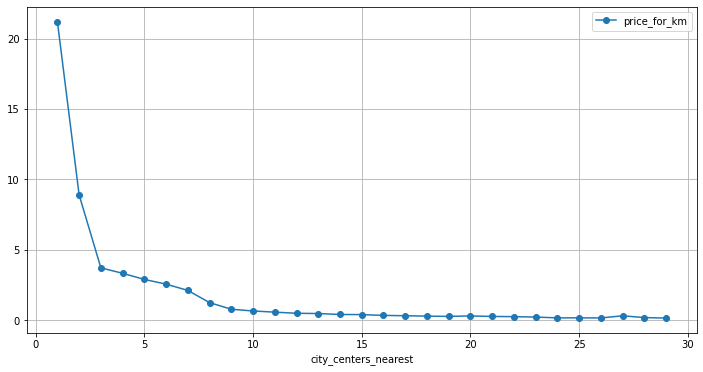

In [109]:
(spb_centr.query('locality_name == "Санкт-Петербург"') #построим график
.pivot_table(index='city_centers_nearest', values='price_for_km', aggfunc='mean')
.plot(y='price_for_km', grid=True, figsize=(12,6), style='o-'))

array([[<AxesSubplot:title={'center':'price_for_km'}>]], dtype=object)

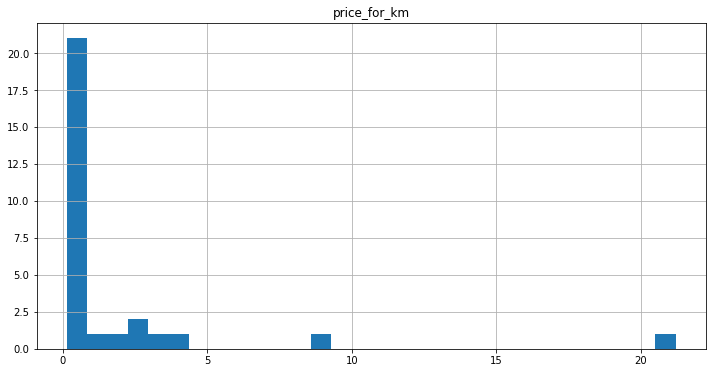

In [110]:
(spb_centr.query('locality_name == "Санкт-Петербург"') #построим гистограмму
.pivot_table(index='city_centers_nearest', values='price_for_km', aggfunc='mean')
.hist(bins=30, figsize=(12,6)))

На обоих графиках виден всплеск цен за метр2 до 9 км от центра города. За радиусом в 9 км цены стабилизируются и имеют нитиевидный стабильный снижающийся график. 
Принимаем 9ти километровый радиус за центр Санкт-Петербурга

### 4.7. Проанализируем сегмент квартир в центре

In [111]:
centr_apart = spb_centr.query('city_centers_nearest <= 9') #создадим переменную со срезом данных по центру города
centr_apart.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day,month,year,floor_level,living_ratio,kitchen_ratio,price_for_km
3,0,64.9,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,7,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,NaN,NaN,9.271429
4,2,10.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.320000,0.410000,1.250000
24,8,6.5,97.2,2015-10-31,2,NaN,3.0,46.5,1,False,False,False,19.6,0.0,Санкт-Петербург,20052.0,2,3.0,411.0,3.0,124.0,265.0,66872.43,5,10,2015,первый,0.478395,0.201646,3.250000
35,6,15.5,149.0,2017-06-26,5,NaN,5.0,104.0,4,False,False,False,17.0,0.0,Санкт-Петербург,23670.0,4,0.0,NaN,1.0,779.0,644.0,104026.85,0,6,2017,другой,0.697987,0.114094,3.875000
51,7,45.0,161.0,2017-10-17,3,3.20,8.0,38.0,4,False,False,False,50.0,0.0,Санкт-Петербург,32537.0,7,0.0,NaN,3.0,99.0,541.0,279503.11,1,10,2017,другой,0.236025,0.310559,6.428571


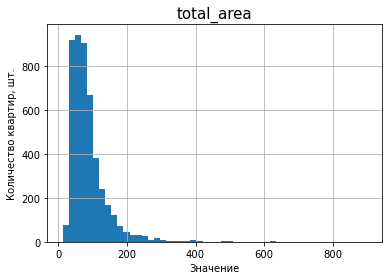

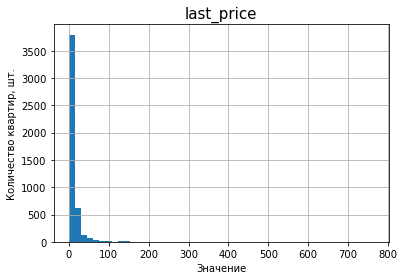

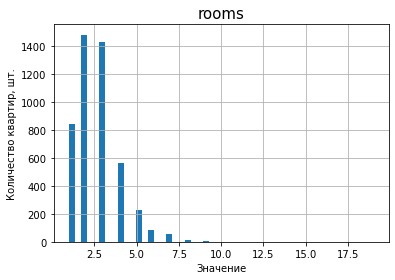

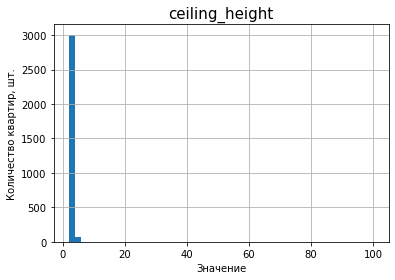

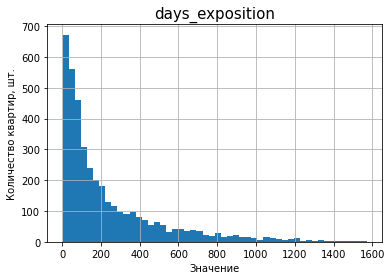

In [112]:
#посмотрим на диаграммы столбцов параметров и средние значения 
for column in centr_apart[['total_area','last_price','rooms','ceiling_height','days_exposition']]:
    range_max = centr_apart[column].max()
    range_min = centr_apart[column].min()
    centr_apart[column].hist(bins=50, range=(range_min,range_max))
    plt.title(column, fontsize=15)
    plt.xlabel('Значение')
    plt.ylabel('Количество квартир, шт.')
    plt.show()

In [113]:
centr_corr = centr_apart.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
centr_corr

,index,last_price
0,last_price,1.000000
1,price_meter,0.777582
2,price_for_km,0.751653
3,total_area,0.643910
4,living_area,0.548918
5,kitchen_area,0.508972
6,rooms,0.352095
7,total_images,0.133979
8,ponds_around3000,0.127166
9,parks_around3000,0.117051


Выводы:
- в центре Санкт-Петербурга радиусом 9 км цена квартиры зависит от удаленности от центра, чем ближе к центру, тем дороже
- есть зависимость цены от общей площади квартиры, чем больше, тем дороже

#### Сравним средние значения параметров продаваемых квартир в центре Санкт-Петербурга и вне центра

In [114]:
#создадим переменную со средними значениями по основным параметрам центра Санкт-Петербурга
centr_mean = centr_apart[['total_area'
                          ,'last_price'
                          ,'floor'
                          , 'day'
                          , 'month'
                          , 'year'
                          ,'rooms'
                          ,'ceiling_height'
                          ,'days_exposition']]\
        .mean()\
        .reset_index()

In [115]:
#так же для общей таблицы без учета квартир в центре
data_mean = data.query('city_centers_nearest > 9')
data_mean = data_mean[['total_area'
                          ,'last_price'
                          ,'floor'
                          , 'day'
                          , 'month'
                          , 'year'
                          ,'rooms'
                          ,'ceiling_height'
                          ,'days_exposition']]\
        .mean()\
        .reset_index()

In [116]:
general_mean = centr_mean.merge(data_mean, on='index')  #соединим обе таблицы
general_mean = general_mean.rename(columns={'index':'parametr', '0_x':'centr_mean', '0_y':'data_mean'})
general_mean

,parametr,centr_mean,data_mean
0,total_area,86.376041,63.344490
1,last_price,13.267576,7.575723
2,floor,4.625346,6.119643
3,day,2.521582,2.561067
4,month,6.396343,6.407928
5,year,2017.219647,2017.344646
6,rooms,2.681480,2.152530
7,ceiling_height,3.086092,2.786339
8,days_exposition,232.633796,182.406728


Средние показатели в центре Санкт-Петербурга выше чем в других районах и населенных пунктах, что в целом логично

### Этап 5. Сделаем общие выводы

В рамках данного проекта мы изучили архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

#### При выполнении проекта поэтапно сделали следующие шаги:

#### 1. Исправили ошибки и аномалии:

    1.1. Пропуски в данных о наличии балконов заменили на нули.
    1.2. Пропущенные значение в данных о количестве комнат заменили на среднее значение по выборке.
    1.3. Пропуски в столбе 'апартаменты' заменили на булет тип 'False' - 'не апартаменты'.
    1.4. Удалили строки без указания населенного пункта. Для анализа эти данные бессмысленны.
    1.5. Заменили данные о дате на соответствующий тип данных.
    1.6. Перевели цены на квартиру в миллионы.
    1.7. Удалили выбросы в этажах: 52 и 60 этажных жилых зданий в Лен.области нет.

#### 2. Рассчитали и добавили к данным:

    2.1. Цену квадратного метра.
    2.2. Дату публикации по дням, неделям, годам.
    2.3. Категории этажности квартир.
    2.4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.

#### 3. Проанализировали данные:

    3.1. Изучили какие параметры влияют на ценообразование, построили графики.
            Выводы исходя из графиков:
            - Чем больше площадь квартиры, тем она дороже.
            - Количество комнат не влияет на ценообразование.
            - Отдаляясь от центра, квартиры дешевле в цене.
            - Квартиры на первых этажах дешевле остальных.
            - Зависимость цены от даты размещения объявления (день, месяц) практически нет - в рамках среднего значения.
            - С 2014г. по 2018г. наблюдалось снижение цены на квартиры, с 2018г. - повышение.

    3.2. Изучили время продажи квартир: среднее, медианное, наибольшее и наименьшее:
            - В среднем продажа квартиры занимает от 41 дней до 181 дня.
            - Продажу быстрее, чем за 41 день можно считать быстрой, а более полугода = долгой
            - Среднее значение нашей выборки составляет 126 дней
            - Медианное значение = 84 дня
            - Сверхбыстрые продажи, это 1-3 дня, это 1% от общего количества.
            - Сверхдолгие продажи - более 500 дней, таких 7% от всех продаж.

    Ответили на вопросы:
    4. Выделили населенные пункты с самой высокой и низкой стоимостью жилья среди топ-10 с наибольшим числом объявлений.
        - Самая высокая стоимость квадратного метра в Санкт-Петербурге = 114 869 рублей
        - Самая низкая цена за квадратный метр в Выборге = 58 141 рубль.
    5. Определили центр Санкт-Петербурга, проанализировали сегмент квартир:
        Центр города = радиус 9 км.
        Существует зависимость цены от общей площади квартиры, чем больше, тем дороже.

#### Рекомендации для разработчиков
- сделать для параметров "балкон", "этаж", "этажность дома", "число комнат", "высота потолка", "апартаменты" ниспадающие окна, чтоб пользователь выбрал необходимое, исключив тем самым пропуски в данных
- автоматизировать получение данных о расстояниях до парков, водоемов и аэропортов.